# **How to Win the Tour de France**

# **Executive Summary**

This project explores a data challenge within professional cycling: identifying the factors contributing to winning the Tour de France (TDF). As cycling’s most prestigious race, it is a complex, multi-stage competition that tests riders' endurance and tactics across terrains. The project aimed to uncover patterns in performance by integrating individual stage results, rider physiology and race structure, revealing that TDF success stems not from raw physical attributes, but from strategy and performance in high-impact stages.

**Features**

1.   **Winners**

*   edition: Edition of Tour de France
*   start_dat: Start date of Tour de France
*   decade: Decade of the Tour de France derived from start_date
*   year: Year of the Tour de France derived from start_date
*   winner_name: Winner's name
*   winner_team: Winner's team
*   distance: Distance of Tour de France in kilometres
*   time_overall: Time taken to complete the Tour de France in hours
*   speed_kmh: Average speed derived distance and time_overall
*   stage_wins:	Number of stage won by the winner
*   stages_led:	Number of stages winner retained the yellow jersey
*   height:	Winner's height
*   weight:	Winner's weight
*   age:	Winner's age
*   born:	Winner's date of birth
*   nationality:	Winner's nationality

2. **Stages**

*  Stage: Stage number
*  Date:	Date of stage
*  Year:	Tour de France date
*  Distance:	Stage distance in kilometres
*  Origin:	City of stage start
*  Destination:	City of stage finish
*  Type:	Type of stage
*  Winner:	Winner of stage

# **Methodology and Tools**

CSV format datasets were transformed in Excel, with data and visualisation and manipulation with Python libraries Pandas, Seaborn and Matplotlib, in Google Colab as the platform for execution. Three datasets sourced from Kaggle and Github, with a data imputation approach for missing data from ProCyclingStats (Little and Rubin, 2019).

Links to datasets:

*   tdf_winners + tdf_stages:  https://www.kaggle.com/datasets/pablomonleon/tour-de-france-historic-stages-data
*   TDF_Stages_History: https://github.com/thomascamminady/LeTourDataSet/blob/master/data/TDF_Stages_History.csv

# **ETL Process**

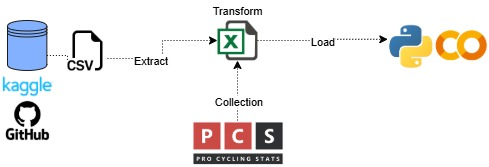

# **Transformation**

1.   **Winners**

The winners dataset included winners from 1903 to 2019, with data up to 2024 inputted. Redundant fields and those with formatting inconsistencies (nicknames, birth towns, time-margin) were removed. Speed was derived using distance over time. Missing values for height, weight, and date-of-birth were inputted, with averages used as proxies when values were unavailable.

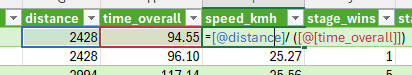

A decade and year column were engineered from the start date to support trend analysis.

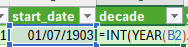

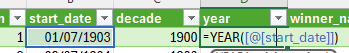

2. **Stages**

The stages dataset is a combination of two datasets - the Kaggle dataset was limited to 2017, hence entries to 2024 were added from the Github dataset. Incomplete 'jersey' columns were removed. Winner and team information split by delimiter into two columns, with missing entries supplemented. Stage types were standardised into four main categories to simplify analysis. Year was also engineered from Date. Accented characters in rider names were standardised with the unicodedata library to link stage specialists to winners.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import unicodedata

In [ ]:
df_winners = pd.read_excel('tdf_winners_clean.xlsx')
df_winners.head()

,edition,start_date,decade,year,winner_name,winner_team,distance,time_overall,speed_kmh,stage_wins,stages_led,height,weight,age,born,nationality
0,1,1903-07-01,1900,1903,Maurice Garin,La Française,2428.0,94.553889,25.678478,3,6,1.62,60,32,03/03/1871,France
1,2,1904-07-02,1900,1904,Henri Cornet,Conte,2428.0,96.098611,25.265714,1,3,1.60,69,19,04/08/1884,France
2,3,1905-07-09,1900,1905,Louis Trousselier,Peugeot–Wolber,2994.0,117.140000,25.559160,5,10,1.61,68,24,29/06/1881,France
3,4,1906-07-04,1900,1906,René Pottier,Peugeot–Wolber,4637.0,148.500000,31.225589,5,12,1.63,68,27,05/06/1879,France
4,5,1907-07-08,1900,1907,Lucien Petit-Breton,Peugeot–Wolber,4488.0,142.300000,31.539002,2,5,1.76,69,24,18/10/1882,France


In [ ]:
df_stages = pd.read_excel('tdf_stages_clean.xlsx')
df_stages.head()

,Stage,Date,Year,Distance,Origin,Destination,Type,Winner
0,1,1903-07-01,1903,467.0,Paris,Lyon,Flat Stage,Maurice Garin
1,2,1903-07-05,1903,374.0,Lyon,Marseille,Mountain Stage,Hippolyte Aucouturier
2,3,1903-07-08,1903,423.0,Marseille,Toulouse,Flat Stage,Hippolyte Aucouturier
3,4,1903-07-12,1903,268.0,Toulouse,Bordeaux,Flat Stage,Charles Laeser
4,5,1903-07-13,1903,425.0,Bordeaux,Nantes,Flat Stage,Maurice Garin


# **Analysis**

**Physiological Trends**

Longitudinal analysis showed age fluctuating significantly before declining in the 2020s. Height steadily increased before plateauing in the 1990s, suggesting a preference for taller riders, likely due to advantages in time trials. Weight trends are more irregular, but have declined post-1990s, aligning with a shift towards power-to-weight optimisation for climbing. Modern winners reflect a new archetype of taller, younger, and lighter riders shaped by scientific advancements and early talent identification (Pinot and Grappe, 2014).

In [ ]:
# Pre-aggregate the data by decade
df_decade = df_winners.groupby("decade").agg({
    "age": "mean",
    "height": "mean",
    "weight": "mean"
}).reset_index()

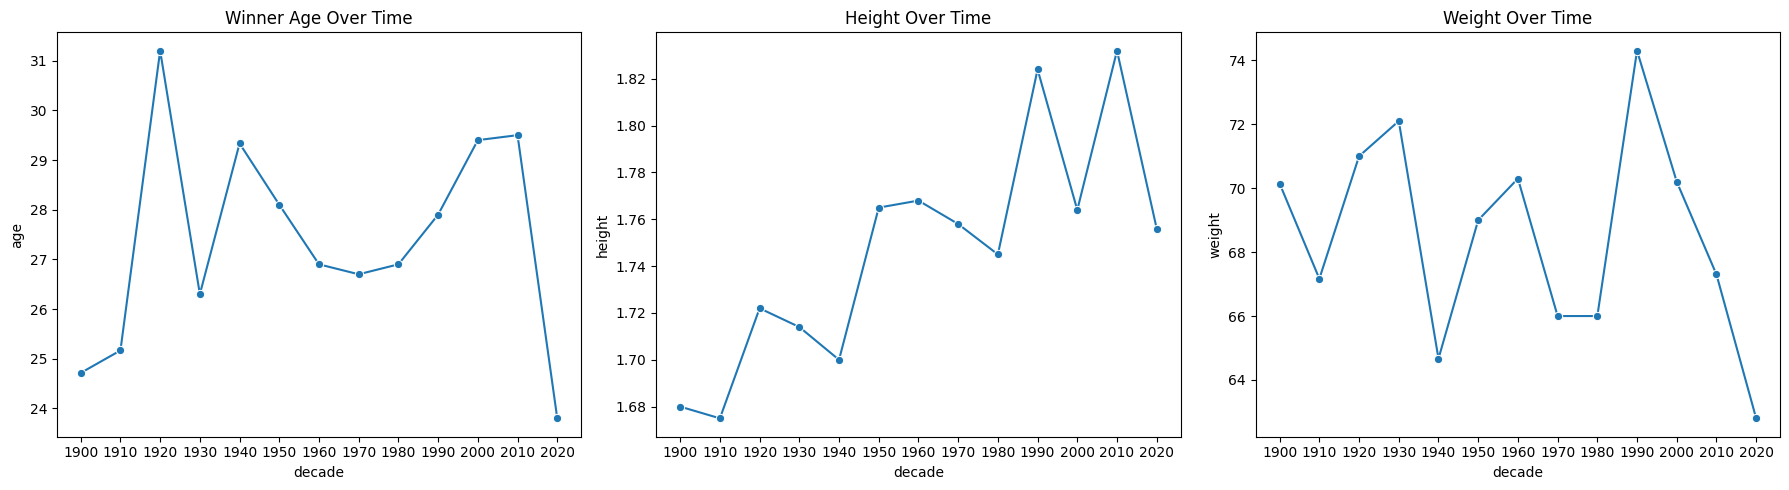

In [ ]:
# Trends

all_decades = sorted(df_winners["decade"].unique())

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.lineplot(data=df_decade, x="decade", y="age", ax=axes[0], marker="o")
axes[0].set_title("Winner Age Over Time")
axes[0].set_xticks(all_decades)
axes[0].set_xticklabels([str(d) for d in all_decades])

sns.lineplot(data=df_decade, x="decade", y="height", ax=axes[1], marker="o")
axes[1].set_title("Height Over Time")
axes[1].set_xticks(all_decades)
axes[1].set_xticklabels([str(d) for d in all_decades])

sns.lineplot(data=df_decade, x="decade", y="weight", ax=axes[2], marker="o")
axes[2].set_title("Weight Over Time")
axes[2].set_xticks(all_decades)
axes[2].set_xticklabels([str(d) for d in all_decades])

plt.tight_layout()
plt.show()

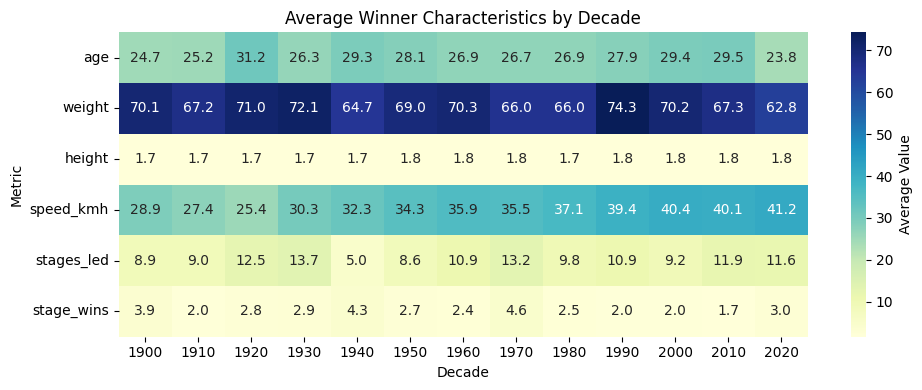

In [ ]:
# The Ideal Winner Heatmap Over Time

summary = df_winners.groupby("decade")[["age", "weight", "height", "speed_kmh", "stages_led", "stage_wins"]].mean().round(2)

plt.figure(figsize=(10, 4))
sns.heatmap(summary.T, annot=True, cmap="YlGnBu", fmt=".1f", cbar_kws={"label": "Average Value"})
plt.title("Average Winner Characteristics by Decade")
plt.xlabel("Decade")
plt.ylabel("Metric")
plt.tight_layout()
plt.show()

**Stage Composition and Design**

A shift in race composition is visible, with flat stages once comprising over 70% of the race now accounting for just 20%. From the 1980s, hilly stages and time trials increased, and mountain stages remain significant, suggesting a route design aimed at discouraging sprint-heavy dominance and encouraging all-round performances. Modern race design maximises competitive variability and unpredictability, enhancing spectator interest and strategy (Thompson, 2006).

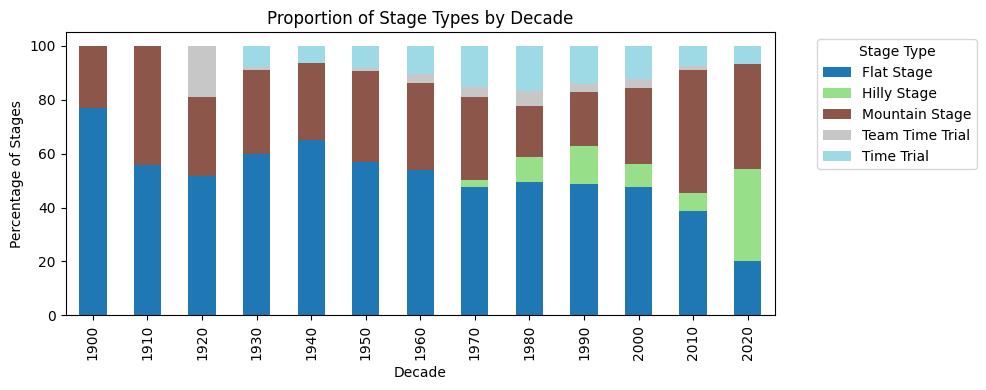

In [ ]:
# Proportion of Stage Types by Year

df_stages['decade'] = (df_stages['Year'] // 10) * 10

decade_counts = df_stages.groupby(['decade', 'Type']).size().unstack(fill_value=0)
decade_props = (decade_counts.div(decade_counts.sum(axis=1), axis=0) * 100).round(1)

decade_props.plot(kind='bar', stacked=True, colormap='tab20', figsize=(10, 4))
plt.title("Proportion of Stage Types by Decade")
plt.ylabel("Percentage of Stages")
plt.xlabel("Decade")
plt.legend(title="Stage Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

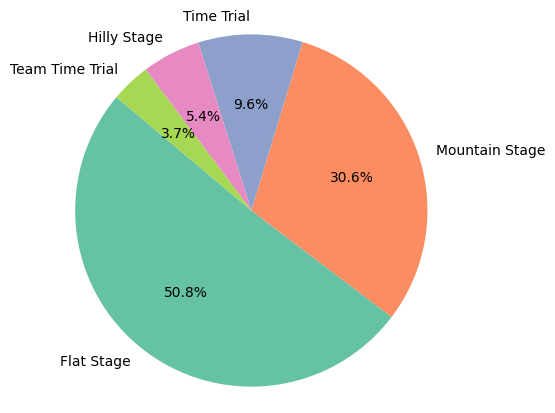

In [ ]:
# Proportion of Stage Types
stage_type_counts = df_stages['Type'].value_counts()

# Plot pie chart
plt.figure(figsize=(5, 5))
plt.pie(stage_type_counts, labels=stage_type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.axis('equal')
plt.show()

**Winner Speed Trends**

No clear trend between physiology and speed is observed, suggesting that these alone do not account for performance variability, as cycling outcomes depend on tactical and environmental variables. Physical traits may inform potential, but they are not deterministic of speed across the diverse demands of a multi-week race (Lucía *et al.*, 2001, Padilla *et al.*, 2000). Yet, the progression of speed revealed a compelling narrative of technological and training advancement and shifting race design. In the early 20th century, speeds hovered around 30 km/h, constrained by rudimentary equipment, poor road conditions, and limited support. Following the dips during the wars, underscoring the impact of global conflict, a gradual rise becomes evident. The rise from the 1990s past 40 km/h aligns with the controversial chapter associated with performance-enhancing drugs (Lodewijkx and Brouwer, 2011). This also coincides with the decline in flat stages, where despite the increase in mountain and hilly stages, top riders continued to achieve higher speeds, reflecting improved pacing strategies and aerodynamic gear, rather than changes in rider physiology. Post-2010, speed stabilises at still a high plateau now with stricter anti-doping controls, suggesting that current performance levels are sustained more by holistic athlete and route optimisation.

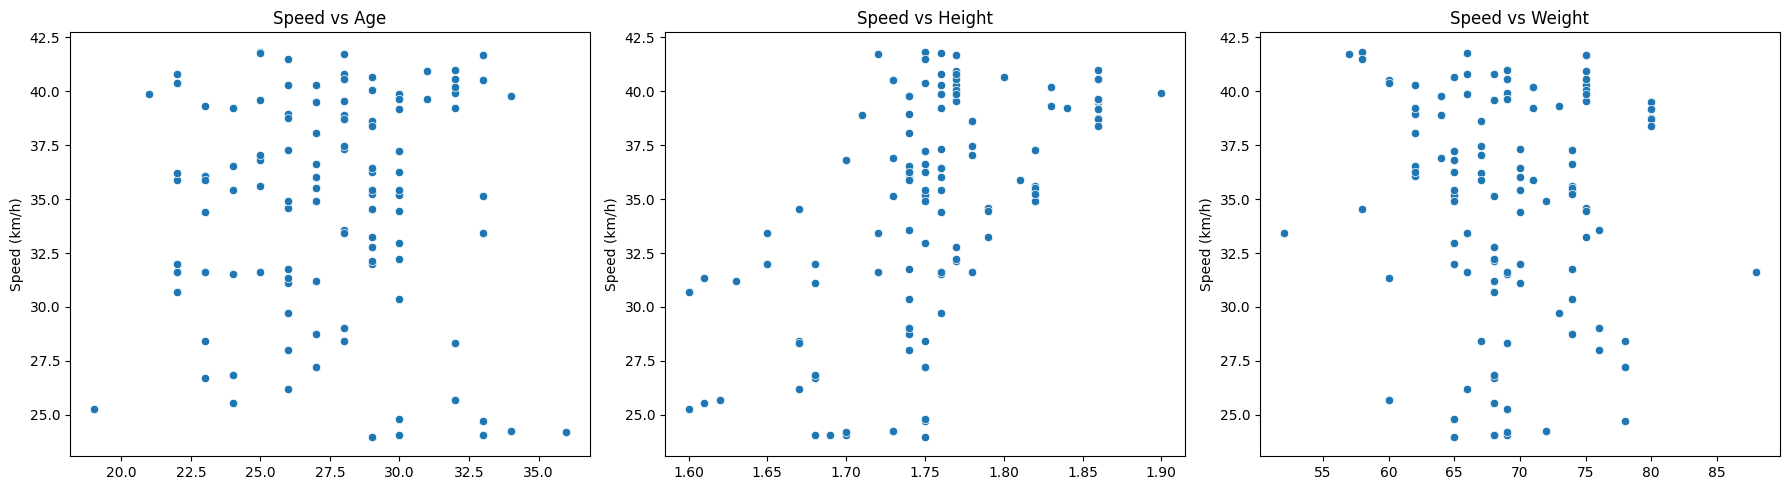

In [ ]:
# Physical Traits vs Speed

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(data=df_winners, x="age", y="speed_kmh", ax=axes[0])
axes[0].set_title("Speed vs Age")

sns.scatterplot(data=df_winners, x="height", y="speed_kmh", ax=axes[1])
axes[1].set_title("Speed vs Height")

sns.scatterplot(data=df_winners, x="weight", y="speed_kmh", ax=axes[2])
axes[2].set_title("Speed vs Weight")

for ax in axes:
    ax.set_ylabel("Speed (km/h)")
    ax.set_xlabel("")

plt.tight_layout()
plt.show()

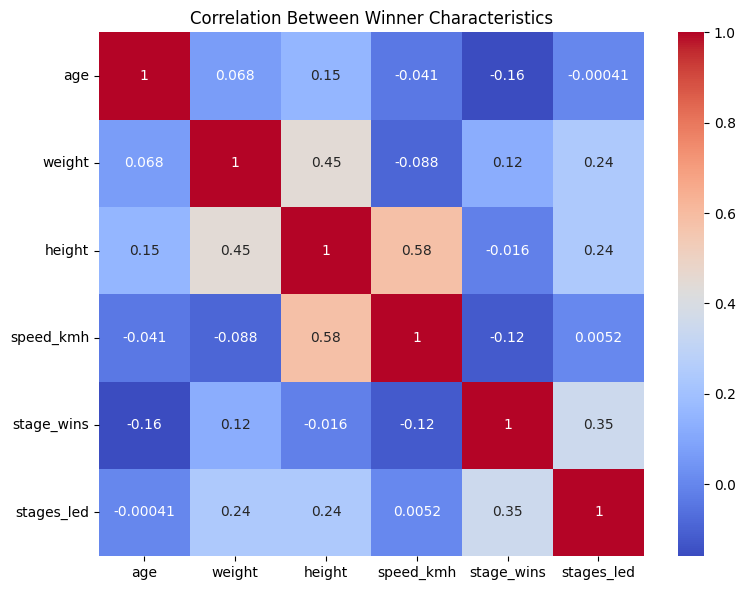

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_winners[["age", "weight", "height", "speed_kmh", "stage_wins", "stages_led"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Winner Characteristics")
plt.tight_layout()
plt.show()

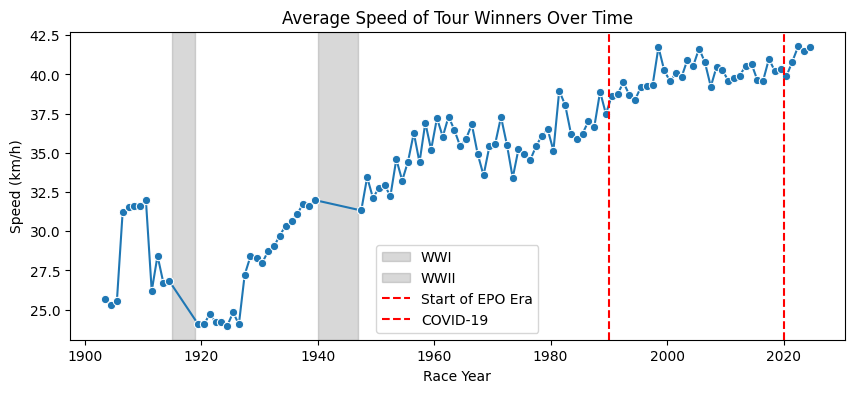

In [ ]:
# Average Speed Over Time
plt.figure(figsize=(10, 4))
sns.lineplot(data=df_winners, x="start_date", y="speed_kmh", marker="o")
plt.title("Average Speed of Tour Winners Over Time")
plt.xlabel("Race Year")
plt.ylabel("Speed (km/h)")
# Annotate events
plt.axvspan(pd.to_datetime('1915-01-01'), pd.to_datetime('1918-12-31'), color="grey", alpha=0.3, label="WWI")
plt.axvspan(pd.to_datetime('1940-01-01'), pd.to_datetime('1946-12-31'), color="grey", alpha=0.3, label="WWII")
plt.axvline(pd.to_datetime('1990-01-01'), color="red", linestyle="--", label="Start of EPO Era")
plt.axvline(pd.to_datetime('2020-03-01'), color="red", linestyle="--", label="COVID-19")
plt.legend()
plt.show()

**Distance vs Speed**

A negative correlation emerged between total distance and winner speed asrace lengths decreased to ~2500km from ~5500km, and stages from ~350 km to ~170 km, allowing for reduced physiological strain (Mujika and Padilla, 2001). Stage diversification further supports this, as mountain and time trials require shorter, more intense efforts. Together with the absence of correlation between physiology and speed, this further suggests that aerodynamic equipment, nutrition, support infrastructure and route design have overtaken individual physiology in determining success (Joyner and Coyle, 2008).

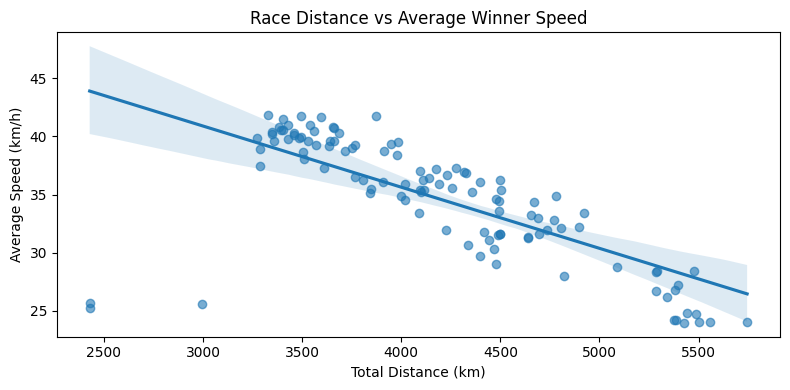

In [ ]:
# Speed vs Distance Scatterplot

plt.figure(figsize=(8, 4))
sns.regplot(data=df_winners, x="distance", y="speed_kmh", scatter_kws={"alpha": 0.6})
plt.title("Race Distance vs Average Winner Speed")
plt.xlabel("Total Distance (km)")
plt.ylabel("Average Speed (km/h)")
plt.tight_layout()
plt.show()

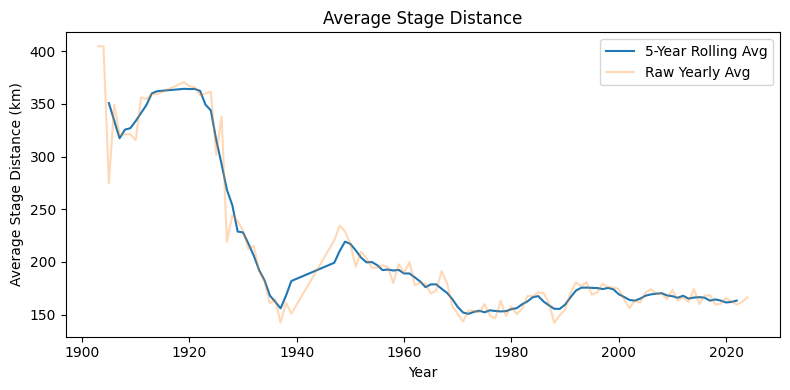

In [ ]:
# Average Stage by Year 5-Year Rolling Average

avg_dist_per_year = df_stages.groupby('Year')['Distance'].mean().reset_index()
avg_dist_per_year['rolling_5yr'] = avg_dist_per_year['Distance'].rolling(window=5, center=True).mean()

plt.figure(figsize=(8,4))
sns.lineplot(data=avg_dist_per_year, x='Year', y='rolling_5yr', label="5-Year Rolling Avg")
sns.lineplot(data=avg_dist_per_year, x='Year', y='Distance', alpha=0.3, label="Raw Yearly Avg")
plt.title("Average Stage Distance")
plt.xlabel("Year")
plt.ylabel("Average Stage Distance (km)")
plt.legend()
plt.tight_layout()
plt.show()

**Dominance, Strategy, and Stage Wins**

In the inaugural editions, the race consisted of as few as 6 stages, reflecting both logistical limitations and the experimental nature of the event. The peak occurred in 1937 at 31 stages, inflated by multiple race segments within a single day, which coincides with a concurrent dip in the number of stages led by the eventual winner by contributing to leadership shifting more frequently due their unpredictability. The number of stages then settled at 21 in the 2000s, a format that balances endurance, strategy, and broadcasting. This increase in stages does not correlate with a decrease in winner speed, with speeds having steadily increased due to road quality, equipment, training, and race support.

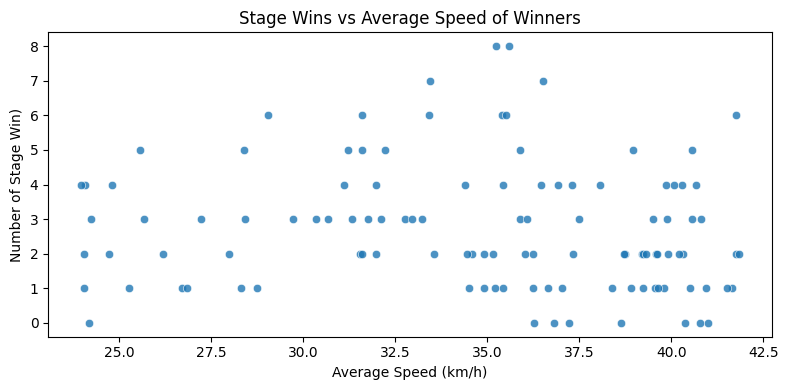

In [ ]:
# Stage Wins vs Average Speed of Winners

plt.figure(figsize=(8, 4))
sns.scatterplot(data=df_winners, x="speed_kmh", y="stage_wins", alpha=0.8)
plt.title("Stage Wins vs Average Speed of Winners")
plt.xlabel("Average Speed (km/h)")
plt.ylabel("Number of Stage Win)")
plt.tight_layout()
plt.show()

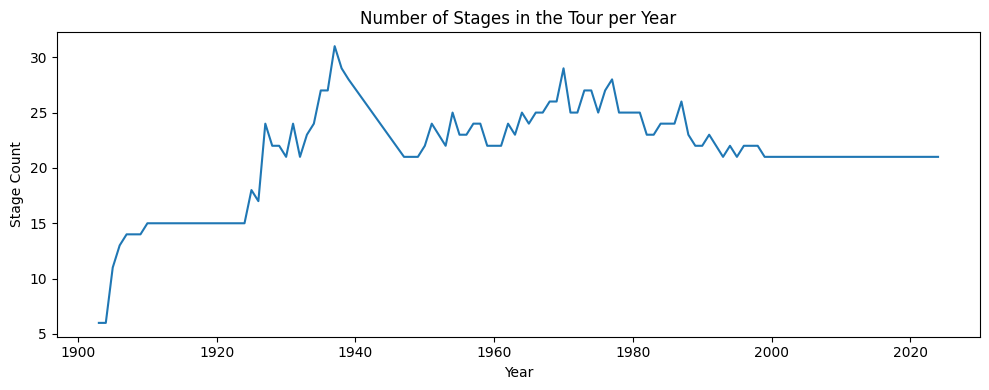

In [ ]:
# Number of Stages per Year

stages_per_year = df_stages.groupby('Year').size()

plt.figure(figsize=(10, 4))
stages_per_year.plot(kind='line')
plt.title("Number of Stages in the Tour per Year")
plt.ylabel("Stage Count")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Stages Led by Overall Winner Over Time')

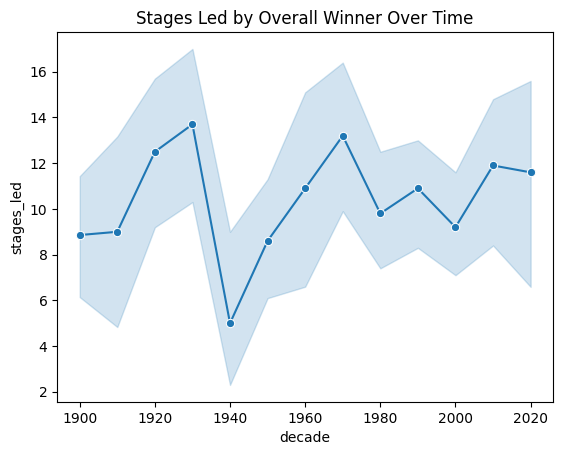

In [ ]:
# Yellow Jersey Dominance

sns.lineplot(data=df_winners, x="decade", y="stages_led", marker="o")
plt.title("Stages Led by Overall Winner Over Time")

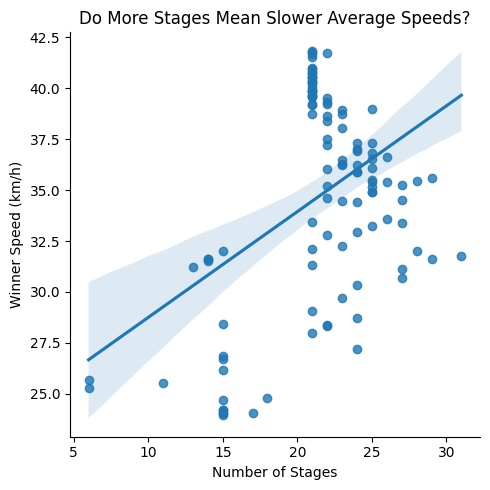

In [ ]:
# Do more Stages Lead to Slower Speeds?

stages_per_year = df_stages.groupby('Year').size().reset_index(name='num_stages')
combined = df_winners.merge(stages_per_year, left_on='year', right_on='Year')
sns.lmplot(data=combined, x='num_stages', y='speed_kmh')
plt.title("Do More Stages Mean Slower Average Speeds?")
plt.xlabel("Number of Stages")
plt.ylabel("Winner Speed (km/h)")
plt.tight_layout()
plt.show()

There is an inverse relationship between the proportion of flat stages and the winner's speed, with no clear trend for mountain stages.  While seemingly counterintuitive, this reflects structural route changes, where speeds were lower due to technological limitations, road quality, and less specialised support. Consequently, the observed negative association may not reflect the intrinsic speed of flat terrain. While mountain stages are slower due to gradient, their proportion alone does not predict speed, likely counterweighted by time trials. Furthermore, the dominance of elite climbers in modern racing, supported by altitude training, mitigates the expected slowing effect.

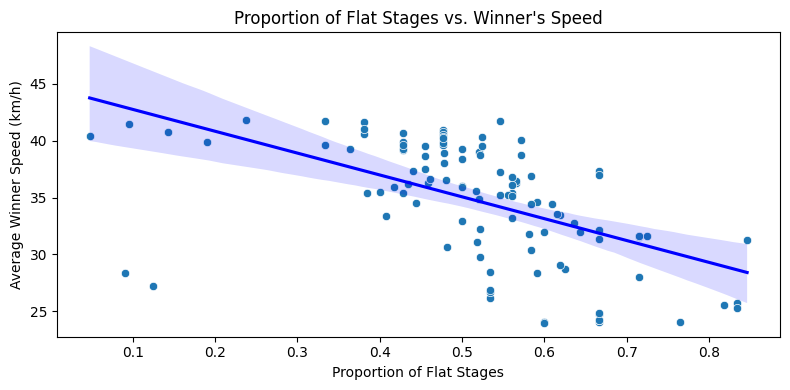

In [ ]:
# Flat Stages vs Winner's Speed

flat_stages = df_stages[df_stages['Type'].str.lower().str.contains('flat')].groupby('Year').size().reset_index(name='flat_stages')

stage_summary = pd.merge(stage_summary, flat_stages, on='Year', how='left').fillna(0)
stage_summary['flat_ratio'] = stage_summary['flat_stages'] / stage_summary['total_stages']

combined = pd.merge(df_winners, stage_summary, left_on='year', right_on='Year', how='left')

plt.figure(figsize=(8, 4))
sns.scatterplot(data=combined, x='flat_ratio', y='speed_kmh')
sns.regplot(data=combined, x='flat_ratio', y='speed_kmh', scatter=False, color='blue')
plt.title("Proportion of Flat Stages vs. Winner's Speed")
plt.xlabel("Proportion of Flat Stages")
plt.ylabel("Average Winner Speed (km/h)")
plt.tight_layout()
plt.show()

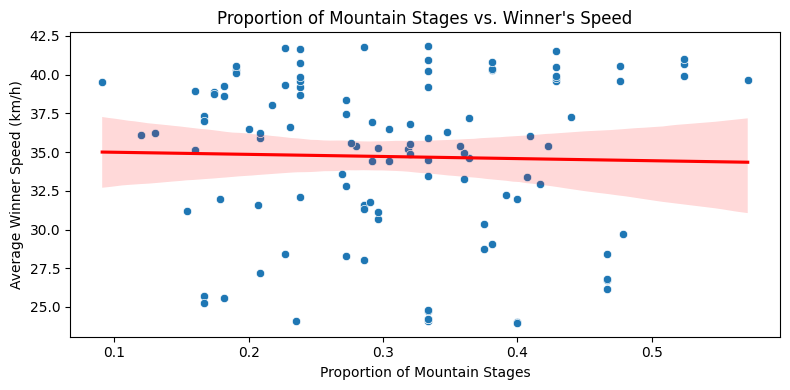

In [ ]:
# Mountain Stages vs Winner's Speed

mountain_stages = df_stages[df_stages['Type'].str.lower().str.contains('mountain', na=False)]

mountain_stage_counts = mountain_stages.groupby('Year').size().reset_index(name='mountain_stages')
stage_summary = df_stages.groupby('Year').size().reset_index(name='total_stages')
stage_summary = pd.merge(stage_summary, mountain_stage_counts, on='Year', how='left')
stage_summary['mountain_ratio'] = stage_summary['mountain_stages'] / stage_summary['total_stages']
combined = pd.merge(df_winners, stage_summary, left_on='year', right_on='Year', how='left')

plt.figure(figsize=(8, 4))
sns.scatterplot(data=combined, x='mountain_ratio', y='speed_kmh')
sns.regplot(data=combined, x='mountain_ratio', y='speed_kmh', scatter=False, color='red')
plt.title("Proportion of Mountain Stages vs. Winner's Speed")
plt.xlabel("Proportion of Mountain Stages")
plt.ylabel("Average Winner Speed (km/h)")
plt.tight_layout()
plt.show()


Analysis of stage wins and jersey leadership indicates that success is not secured through frequent stage victories. Most winners record 1–3 stage wins, suggesting a strategy of sustained consistency for cumulative time gains, rather than aggressive domination. Stage success is more common among sprinters, who rarely contend for the Yellow Jersey. The lack of correlation between speed and stage wins underscores the multifactorial nature of victory. High speed reflects favourable conditions or team support, but not necessarily tactical dominance on individual days. Dominance scores indicate substantial variability - some champions win while leading fewer stages, implying a late surge or targeted attacks in decisive moments, reflecting strategies such as calculated conservatism versus assertive control.

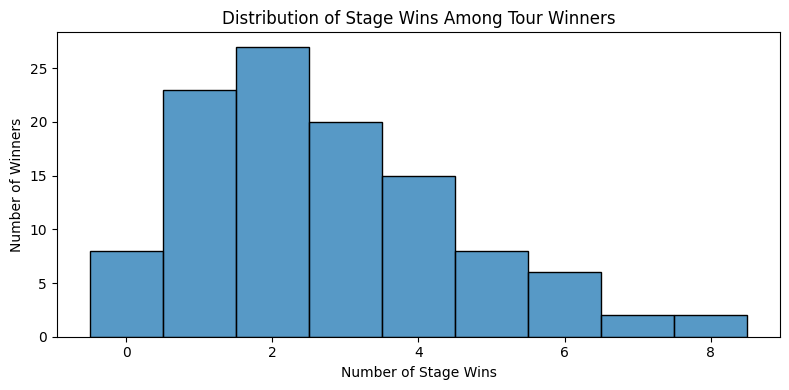

In [ ]:
# Stage Wins vs Overall Victory

plt.figure(figsize=(8, 4))
sns.histplot(df_winners['stage_wins'], bins=range(0, df_winners['stage_wins'].max()+2), discrete=True)
plt.title("Distribution of Stage Wins Among Tour Winners")
plt.xlabel("Number of Stage Wins")
plt.ylabel("Number of Winners")
plt.tight_layout()
plt.show()

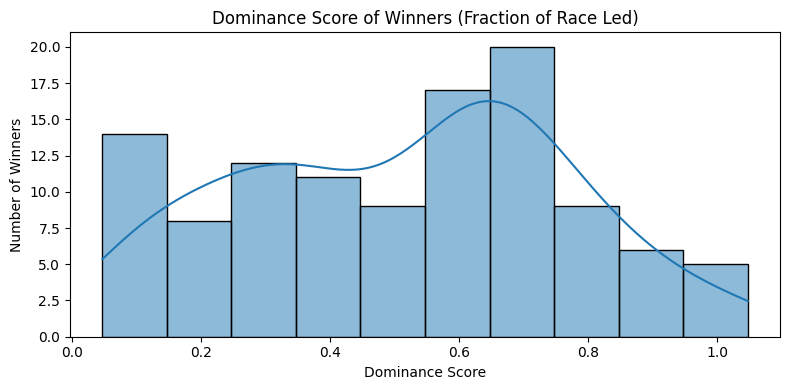

In [ ]:
# Dominance Score = Stages Led / Total Stages

df_winners["dominance"] = df_winners["stages_led"] / 21  # assuming 21 stages

plt.figure(figsize=(8, 4))
sns.histplot(df_winners["dominance"], bins=10, kde=True)
plt.title("Dominance Score of Winners (Fraction of Race Led)")
plt.xlabel("Dominance Score")
plt.ylabel("Number of Winners")
plt.tight_layout()
plt.show()

The leaderboards further develop the view of how dominance, stage success, and speed can diverge. Earlier champions like Merckx and Hinault stand out for combining high stage wins with prolonged dominance, embodying the archetype of the all-around, aggressive champion, while modern riders such as Vingegaard and Pogačar are among the fastest but with less stage wins, reflecting more controlled efforts. This distinction becomes more apparent when viewed through the lens of stage type. Mountain stages and time trials, where endurance and pacing are decisive, are frequently won by Tour winners. In contrast, flat stages are almost exclusively dominated by sprinters, who do not win the Tour. While climbers such as Merckx, Pogačar, and Hinault frequently feature among both stage winners and overall champions, pure sprinters like Cavendish accumulate numerous stage wins without threatening the jersey.

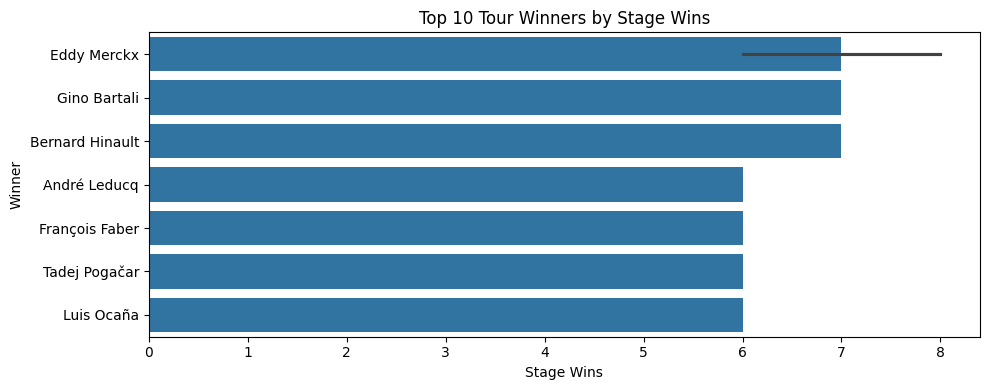

In [ ]:
# Stage Wins per Winner (Top 10)

top_stage_winners = df_winners.sort_values("stage_wins", ascending=False).head(10)

plt.figure(figsize=(10, 4))
sns.barplot(x="stage_wins", y="winner_name", data=top_stage_winners)
plt.title("Top 10 Tour Winners by Stage Wins")
plt.xlabel("Stage Wins")
plt.ylabel("Winner")
plt.tight_layout()
plt.show()

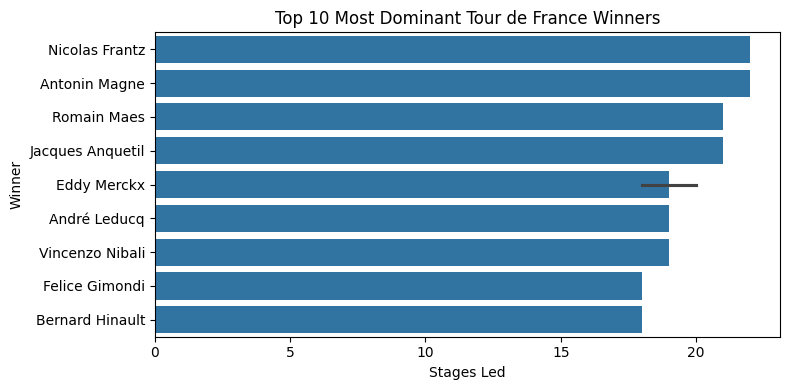

In [ ]:
# Most Dominant Winners of All Time

top_dominant = df_winners.sort_values("stages_led", ascending=False).head(10)

plt.figure(figsize=(8, 4))
sns.barplot(data=top_dominant, y="winner_name", x="stages_led")
plt.title("Top 10 Most Dominant Tour de France Winners")
plt.xlabel("Stages Led")
plt.ylabel("Winner")
plt.tight_layout()
plt.show()

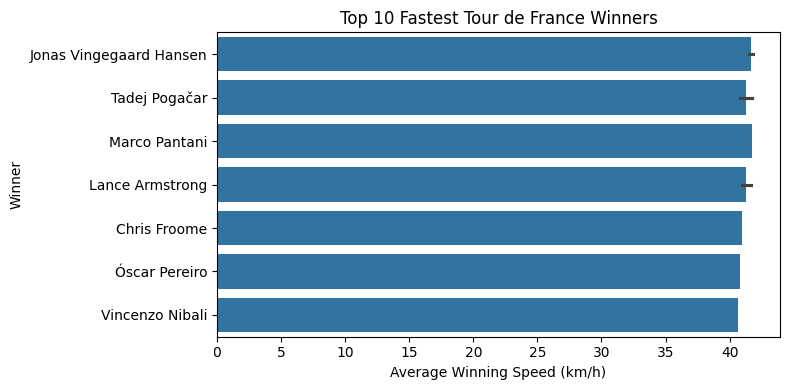

In [ ]:
# Top 10 fastest winners
top_fastest = df_winners.sort_values("speed_kmh", ascending=False).head(10)

plt.figure(figsize=(8, 4))
sns.barplot(data=top_fastest, y="winner_name", x="speed_kmh")
plt.title("Top 10 Fastest Tour de France Winners")
plt.xlabel("Average Winning Speed (km/h)")
plt.ylabel("Winner")
plt.tight_layout()
plt.show()

In [ ]:
# Total stages per year
stage_summary = df_stages.groupby('Year').size().reset_index(name='total_stages')

In [ ]:
# Function to clean rider names: remove accents, lower case, strip whitespace
def clean_name(name):
    if pd.isnull(name):
        return name
    name = ''.join(c for c in unicodedata.normalize('NFKD', name) if not unicodedata.combining(c))
    return name.strip().lower()

# Apply cleaning to both datasets
df_stages['Winner_clean'] = df_stages['Winner'].apply(clean_name)
df_winners['Winner_clean'] = df_winners['winner_name'].apply(clean_name)

# Get top 5 specialists by stage type
top_mountain = df_stages[df_stages['Type'] == 'Mountain Stage']['Winner_clean'].value_counts().head(5)
top_flat     = df_stages[df_stages['Type'] == 'Flat Stage']['Winner_clean'].value_counts().head(5)
top_tt       = df_stages[df_stages['Type'] == 'Time Trial']['Winner_clean'].value_counts().head(5)
top_hilly    = df_stages[df_stages['Type'] == 'Hilly Stage']['Winner_clean'].value_counts().head(5)

# Get set of all TDF winners for fast lookup
tdf_winners_clean = set(df_winners['Winner_clean'].unique())

# Function to print specialist info
def print_specialists(title, top_riders):
    print(f"\n🏁 {title}")
    for rider in top_riders.index:
        status = "TDF Winner" if rider in tdf_winners_clean else "Never Won TDF"
        print(f"{rider.title()}: {top_riders[rider]} wins - {status}")

# Print out analysis
print_specialists("Mountain Stage Specialists", top_mountain)
print_specialists("Flat Stage Specialists", top_flat)
print_specialists("Time Trial Specialists", top_tt)
print_specialists("Hilly Stage Specialists", top_hilly)


🏁 Mountain Stage Specialists
Eddy Merckx: 13 wins - TDF Winner
Francois Faber: 12 wins - TDF Winner
Tadej Pogacar: 12 wins - TDF Winner
Lance Armstrong: 9 wins - TDF Winner
Gino Bartali: 9 wins - TDF Winner

🏁 Flat Stage Specialists
Mark Cavendish: 33 wins - Never Won TDF
Andre Darrigade: 18 wins - Never Won TDF
Rene Le Greves: 15 wins - Never Won TDF
Marcel Kittel: 14 wins - Never Won TDF
Charles Pelissier: 13 wins - Never Won TDF

🏁 Time Trial Specialists
Bernard Hinault: 20 wins - TDF Winner
Eddy Merckx: 16 wins - TDF Winner
Jacques Anquetil: 11 wins - TDF Winner
Lance Armstrong: 11 wins - TDF Winner
Miguel Indurain: 10 wins - TDF Winner

🏁 Hilly Stage Specialists
Wout Van Aert: 4 wins - Never Won TDF
Jasper Philipsen: 4 wins - Never Won TDF
Matej Mohoric: 3 wins - Never Won TDF
Caleb Ewan: 3 wins - Never Won TDF
Mark Cavendish: 2 wins - Never Won TDF


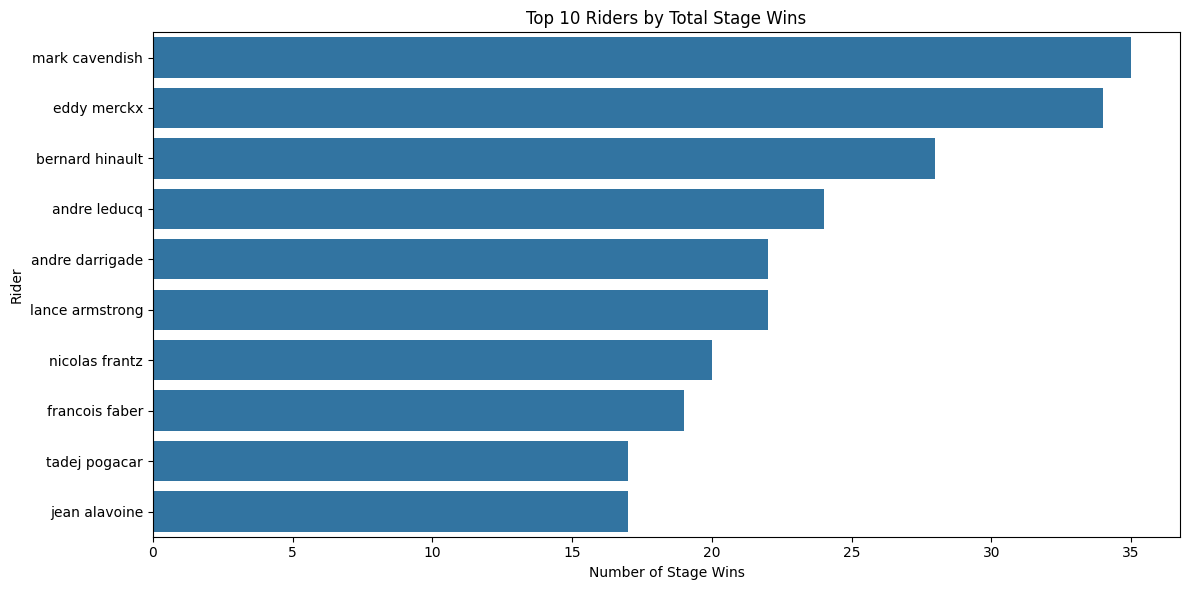

In [ ]:
# Top 10 riders with most stage wins
top_stage_winners = df_stages['Winner_clean'].value_counts().head(10).reset_index()
top_stage_winners.columns = ['Rider', 'Stage Wins']

plt.figure(figsize=(12, 6))
sns.barplot(data=top_stage_winners, x='Stage Wins', y='Rider')
plt.title("Top 10 Riders by Total Stage Wins")
plt.xlabel("Number of Stage Wins")
plt.ylabel("Rider")
plt.tight_layout()
plt.show()

# **Ethical Considerations**

Doping remains a key ethical consideration, particularly when interpreting trends during the 90s–2000s. Bias mitigation included awareness of historical irregularities, namely, some of the fastest winners, Pantani, Froome, and Armstrong, emerged during the EPO era. Data privacy was not applicable given the use of public sports datasets.

# **Recommendations**

The data reinforces that while sprinters may dominate stages, it is the climbers who win. Victory is not predicted by any single metric, but from a combination of physiological, tactical, and team-driven variables.
Winners increasingly exhibit physiological traits characterised by a high power-to-weight ratio, younger, taller, leaner, aligning with research highlighting the importance of power output in mountains (Faria et al., 2005; Santalla et al., 2012). Talent identification should therefore prioritise riders demonstrating high VO₂max and low body mass, with age ranges between 22 and 27 aligning with peak aerobic efficiency (Lucía et al., 1999). Given the increased proportion of mountains and time trials, and as success is not underpinned by peak stage performances but by consistent, controlled efforts in these key stages, training should be tailored to enhance climbing efficiency and pacing, with high-altitude training to improve oxygen delivery and power output (Gore et al., 2001; Broker et al., 1999). Success is strongly influenced by teammates who pace and shield from wind, hence tactical positioning should be integrated into training (Faria et al., 2005).
Data-driven approaches of leveraging power meter data and terrain-specific modelling can optimise performance and predict fatigue accumulation (Sanders et al., 2019). Longitudinal development programs should provide structured progression from youth stages through elite teams, mirroring the trajectories of recent champions like Pogačar and Vingegaard.


# **Future Improvements**

Future work could integrate elevation profiles, weather conditions, and power output data for more precise modelling of rider performance and race dynamics. Furthermore, the development of predictive models using machine learning techniques such as logistic regression, could provide probabilistic forecasts of race outcomes based on rider and stage characteristics.

**Bibliography**


* Broker, J. P., Kyle, C. R., & Burke, E. R. (1999). Racing cyclist power
requirements in the 4000-m individual and team pursuits. Medicine and Science in Sports and Exercise, 31(11), 1677–1685. https://doi.org/10.1097/00005768-199911000-00017

* Faria, E. W., Parker, D. L., & Faria, I. E. (2005). The Science of Cycling: Physiology and Training – Part 1. Sports Medicine, 35(4), 285–312. https://doi.org/10.2165/00007256-200535040-00002

* Gore, C. J., Hahn, A., Aughey, R. J., Martin, D. T., Ashenden, M. J., Clark, S. A., ... & Parisotto, R. (2001). Live high:train low increases muscle buffer capacity and submaximal cycling efficiency. Acta Physiologica Scandinavica, 173(3), 275–286. https://doi.org/10.1046/j.1365-201x.2001.00806.x

* Joyner, M.J. and Coyle, E.F. (2008). Endurance exercise performance: The physiology of champions. The Journal of Physiology, 586(1), pp.35–44. doi:https://doi.org/10.1113/jphysiol.2007.143834.

* Little, R. and Rubin, D. (2019). Statistical Analysis with Missing Data, Third Edition. Wiley Series in Probability and Statistics, 793(3). doi:https://doi.org/10.1002/9781119482260.

* Lodewijkx, H.F.M. and Brouwer, B. (2011). Some Empirical Notes on the Epo Epidemic in Professional Cycling. Research Quarterly for Exercise and Sport, 82(4), pp.740–754. doi:https://doi.org/10.1080/02701367.2011.10599811.

* Lucia, A., Hoyos, J. and Chicharro, J.L. (2001). Physiology of Professional Road Cycling. Sports Medicine, 31(5), pp.325–337. doi:https://doi.org/10.2165/00007256-200131050-00004.

* Lucía, A., Hoyos, J., & Chicharro, J. L. (1999). Physiology of professional road cycling. Sports Medicine, 29(4), 259–277. https://doi.org/10.2165/00007256-199929040-00002

* Mujika, I. and Padilla, S. (2001). Physiological and Performance Characteristics of Male Professional Road Cyclists. Sports Medicine, 31(7), pp.479–487. doi:https://doi.org/10.2165/00007256-200131070-00003.

* Padilla, S., Mujika, I., Orbananos, J. and Angulo, F. (2000). Exercise intensity during competition time trials in professional road cycling. Medicine & Science in Sports & Exercise, 32(4), pp.850–856. doi:https://doi.org/10.1097/00005768-200004000-00019.

* Pinot, J. and Grappe, F. (2014). A six-year monitoring case study of a top-10 cycling Grand Tour finisher. Journal of Sports Sciences, 33(9), pp.907–914. doi:https://doi.org/10.1080/02640414.2014.969296.

* Sanders, D., Heijboer, M., Hesselink, M. K., Myers, T., & Akubat, I. (2019). A multidisciplinary approach to assessing performance in elite road cyclists. International Journal of Sports Physiology and Performance, 14(4), 490–495. https://doi.org/10.1123/ijspp.2018-0485

* Santalla, A., Yanci, J., & Mujika, I. (2012). Physiological characteristics of tour de France cyclists over a 15-year period. International Journal of Sports Physiology and Performance, 7(4), 334–340. https://doi.org/10.1123/ijspp.7.4.334
Thompson, C.S. (2006). The Tour de France. Univ of California Press.
